In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

In [ ]:
dataset_path = '/content/drive/MyDrive/moonimg'

In [ ]:
moon_images = len(os.listdir(os.path.join(dataset_path)))

In [ ]:
print("Number of moon images:", moon_images)

Number of moon images: 4


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

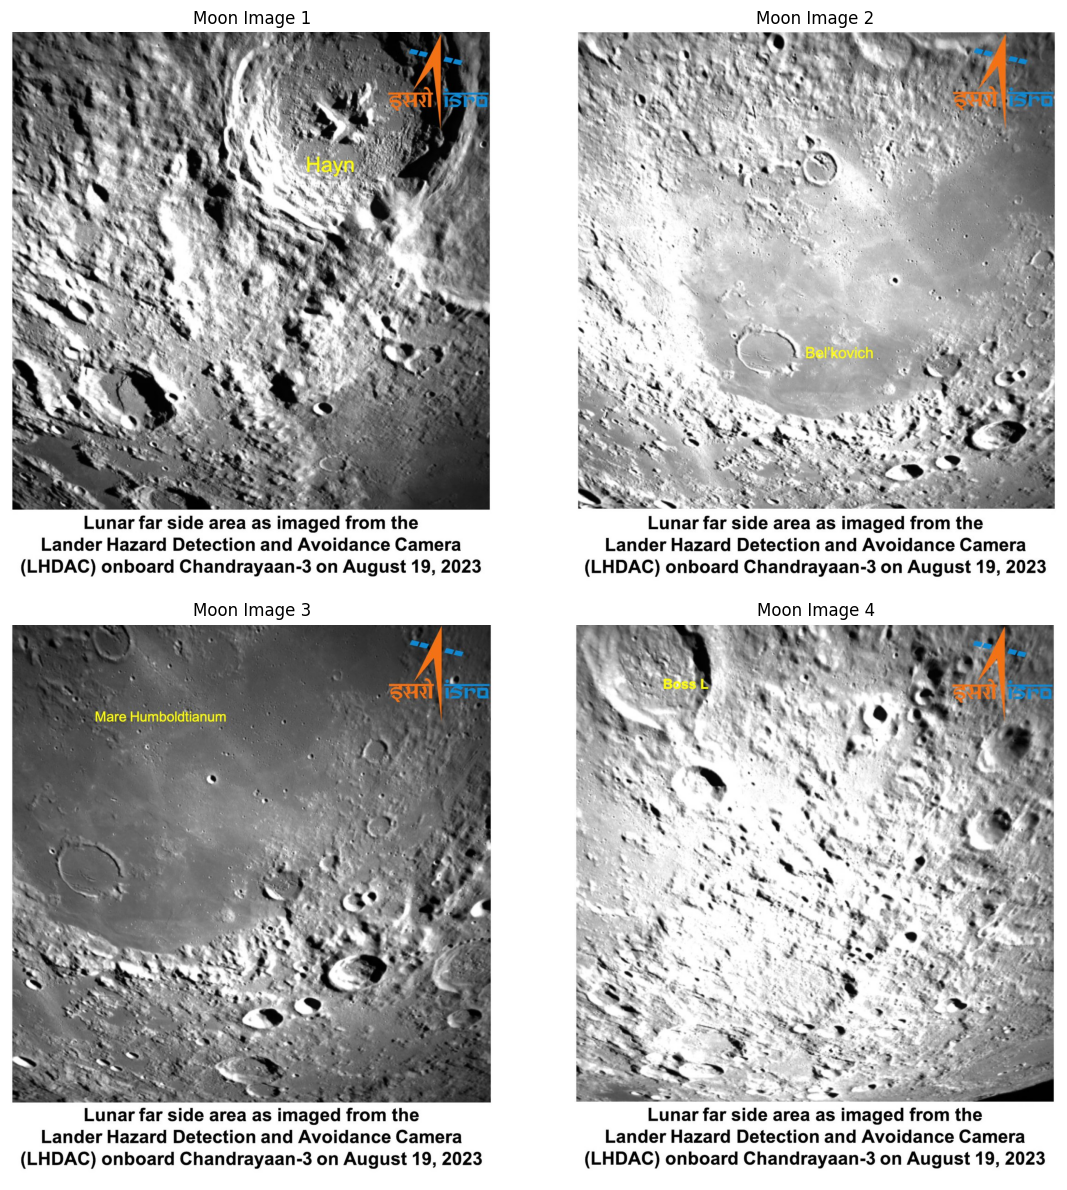

In [ ]:
image_files = [f for f in os.listdir(dataset_path) if f.endswith(".jpg") or f.endswith(".jpeg")]

num_images = len(image_files)
num_cols = 2
num_rows = (num_images + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 12))

for i, image_file in enumerate(image_files):
    row = i // num_cols
    col = i % num_cols
    img_path = os.path.join(dataset_path, image_file)
    img = mpimg.imread(img_path)
    axs[row, col].imshow(img)
    axs[row, col].set_title(f'Moon Image {i + 1}')
    axs[row, col].axis('off')

plt.tight_layout()

plt.show()

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from pathlib import Path

transformation_dict = {
    "horizontal_flip": True,
    "vertical_flip": True,
    "rotation_range": 40,
    "width_shift_range": 0.2,
    "height_shift_range": 0.2,
    "shear_range": 0.2,
    "zoom_range": [0.5, 1.0],
    "brightness_range": [1.1, 1.5],
}

enable_show = False

for filename in os.listdir(dataset_path):
    if filename.endswith(".jpeg") or filename.endswith(".jpg"):
        original_file_path = os.path.join(dataset_path, filename)
        img = load_img(original_file_path)
        data = img_to_array(img)
        samples = np.expand_dims(data, 0)

        for transformation, params in transformation_dict.items():
            datagen = ImageDataGenerator(**{transformation: params})

            it = datagen.flow(samples, batch_size=1, save_to_dir=dataset_path,
                              save_prefix=Path(filename).stem + "_" + transformation, save_format='jpeg')
            batch = it.next()
            print(f"Augmented image saved for {filename} using {transformation} transformation.")

print("Augmentation complete. Augmented images are saved in the same folder as the original images.")

Augmented image saved for moon1.jpeg using horizontal_flip transformation.
Augmented image saved for moon1.jpeg using vertical_flip transformation.
Augmented image saved for moon1.jpeg using rotation_range transformation.
Augmented image saved for moon1.jpeg using width_shift_range transformation.
Augmented image saved for moon1.jpeg using height_shift_range transformation.
Augmented image saved for moon1.jpeg using shear_range transformation.
Augmented image saved for moon1.jpeg using zoom_range transformation.
Augmented image saved for moon1.jpeg using brightness_range transformation.
Augmented image saved for moon4.jpeg using horizontal_flip transformation.
Augmented image saved for moon4.jpeg using vertical_flip transformation.
Augmented image saved for moon4.jpeg using rotation_range transformation.
Augmented image saved for moon4.jpeg using width_shift_range transformation.
Augmented image saved for moon4.jpeg using height_shift_range transformation.
Augmented image saved for moo

In [ ]:
moon_images_new = len(os.listdir(os.path.join(dataset_path)))

In [ ]:
print("Number of new moon images:", moon_images_new)

Number of new moon images: 36


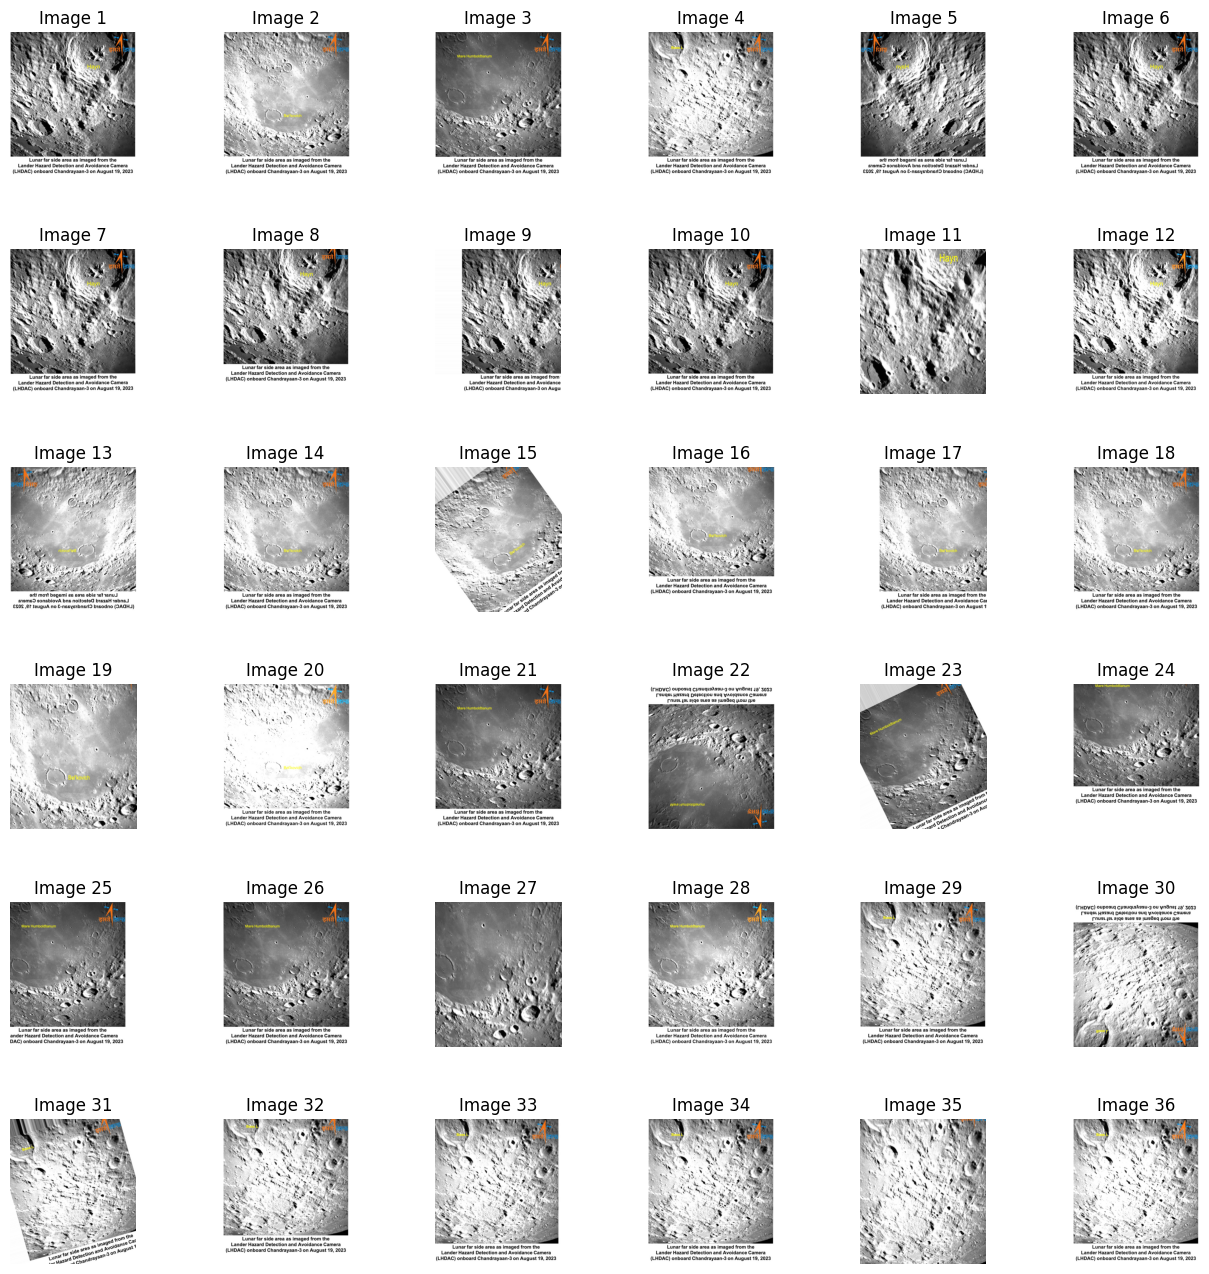

In [ ]:
image_files = [f for f in os.listdir(dataset_path) if f.endswith(".jpg") or f.endswith(".jpeg")]

num_images_to_display = 36

num_cols = min(num_images_to_display, 6)
num_rows = (num_images_to_display + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 16))
fig.subplots_adjust(hspace=0.5)

for i, image_file in enumerate(image_files[:num_images_to_display]):
    img_path = os.path.join(dataset_path, image_file)
    img = cv2.imread(img_path)
    ax = axes[i // num_cols, i % num_cols]
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_title(f"Image {i+1}")
    ax.axis('off')

plt.show()

In [ ]:
enhanced_folder = os.path.join(dataset_path, 'enhanced_moon_images')
os.makedirs(enhanced_folder, exist_ok=True)

image_files = [f for f in os.listdir(dataset_path) if f.endswith(".jpg") or f.endswith(".jpeg")]

enhanced_images = []

for image_file in image_files:
    img_path = os.path.join(dataset_path, image_file)

    image = cv2.imread(img_path)

    enhanced_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    enhanced_image = cv2.equalizeHist(enhanced_image)

    sharpening_kernel = np.array([[-1, -1, -1],
                                  [-1, 9, -1],
                                  [-1, -1, -1]])
    enhanced_image = cv2.filter2D(enhanced_image, -1, sharpening_kernel)

    enhanced_image_path = os.path.join(enhanced_folder, image_file)
    cv2.imwrite(enhanced_image_path, enhanced_image)

    enhanced_images.append(enhanced_image)

In [ ]:
num_images = len(enhanced_images)
num_rows = num_images // 4 + (num_images % 4)
num_cols = 4

plt.figure(figsize=(20, 20))

for i, enhanced_image in enumerate(enhanced_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(enhanced_image, cmap='gray')
    plt.title(f'Enhanced Image {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
for image_file in image_files:

    img_path = os.path.join(dataset_path, image_file)

    image = cv2.imread(img_path)

    image = cv2.medianBlur(image, 5)

    enhanced_images.append(image)

print("Median Blur enhancement complete.")

Median Blur enhancement complete.


In [ ]:
num_images = len(enhanced_images)
num_rows = num_images // 4 + (num_images % 4)
num_cols = 4

plt.figure(figsize=(60, 60))

for i, enhanced_image in enumerate(enhanced_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(enhanced_image, cmap='gray')
    plt.title(f'Enhanced Image {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
for image_file in image_files:

    img_path = os.path.join(dataset_path, image_file)

    image = cv2.imread(img_path)

    edges = cv2.Canny(image, 100, 200)

    enhanced_images.append(edges)

print("Edge Detection (Canny) enhancement complete.")

Edge Detection (Canny) enhancement complete.


In [ ]:
# @title Default title text
num_images = len(enhanced_images)
num_rows = num_images // 4 + (num_images % 4)
num_cols = 4

plt.figure(figsize=(60, 60))

for i, enhanced_image in enumerate(enhanced_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(enhanced_image, cmap='gray')
    plt.title(f'Enhanced Image {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
enhanced_folder = os.path.join(dataset_path, 'enhanced_moon_images')
os.makedirs(enhanced_folder, exist_ok=True)

In [ ]:
for i, enhanced_image in enumerate(enhanced_images):
    enhanced_image_path = os.path.join(enhanced_folder, f'enhanced_{i + 1}.jpg')
    cv2.imwrite(enhanced_image_path, enhanced_image)

print("Enhanced images saved in the 'enhanced_moon_images' folder.")

Enhanced images saved in the 'enhanced_moon_images' folder.


In [ ]:
moon_images_enhanced = len(os.listdir(enhanced_folder))

In [ ]:
print("Number of enhanced moon images:", moon_images_enhanced)

Number of enhanced moon images: 144


In [ ]:
enhanced_folder = os.path.join(dataset_path, 'enhanced_moon_images')
enhanced_images = []

for image_file in os.listdir(enhanced_folder):
    img_path = os.path.join(enhanced_folder, image_file)
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    enhanced_images.append(image)

num_images = len(enhanced_images)
num_cols = 4
num_rows = (num_images + num_cols - 1) // num_cols

In [ ]:
plt.figure(figsize=(300, 300))

for i, enhanced_image in enumerate(enhanced_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(enhanced_image, cmap='gray')
    plt.title(f'Enhanced Image {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()